In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from XGBoostRegressor import XGBoostRegressor

<h3> Simple Dataset </h3>

In [2]:
# a simple dataset to experiment with from: https://www.youtube.com/watch?v=OtD8wVaFm6E
df = pd.DataFrame({'drug_dosage' : [11,15,18,21,22,30,32,36],'drug_effectiveness' : [-10,6,6.5,7,8,-6,-6.5,-7]})

<AxesSubplot:xlabel='drug_dosage', ylabel='drug_effectiveness'>

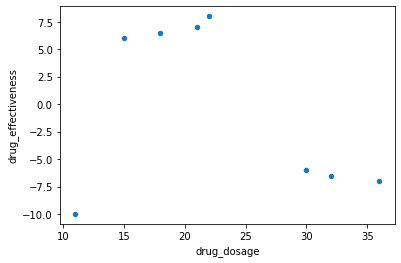

In [3]:
df.plot.scatter(x='drug_dosage',y='drug_effectiveness')

In [4]:
x = df.drop('drug_effectiveness',axis = 1)
y = df[['drug_effectiveness']]

In [5]:
xgb = XGBoostRegressor(max_depth=5,n_estimators=20)

In [6]:
xgb.fit(x,y,learning_rate=0.1,regularization_lambda=0,gamma=0)

Estimator 1 is being trained...
Training MSE: 42.3225
Estimator 2 is being trained...
Training MSE: 34.281225
Estimator 3 is being trained...
Training MSE: 27.76779225
Estimator 4 is being trained...
Training MSE: 22.4919117225
Estimator 5 is being trained...
Training MSE: 18.218448495224997
Estimator 6 is being trained...
Training MSE: 14.75694328113225
Estimator 7 is being trained...
Training MSE: 11.953124057717122
Estimator 8 is being trained...
Training MSE: 9.68203048675087
Estimator 9 is being trained...
Training MSE: 7.842444694268203
Estimator 10 is being trained...
Training MSE: 6.352380202357246
Estimator 11 is being trained...
Training MSE: 5.145427963909369
Estimator 12 is being trained...
Training MSE: 4.167796650766588
Estimator 13 is being trained...
Training MSE: 3.3759152871209372
Estimator 14 is being trained...
Training MSE: 2.734491382567959
Estimator 15 is being trained...
Training MSE: 2.2149380198800466
Estimator 16 is being trained...
Training MSE: 1.7940997961

In [7]:
# define arbitrary test observations
test_x = pd.DataFrame({'drug_dosage' : [5,20,50]})
test_x['drug_effectiveness'] = xgb.predict(test_x)

In [8]:
test_x

,drug_dosage,drug_effectiveness
0,5,-8.814628
1,20,6.118569
2,50,-6.179358


<AxesSubplot:xlabel='drug_dosage', ylabel='drug_effectiveness'>

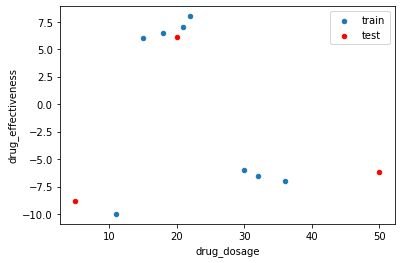

In [9]:
ax = df.plot.scatter(x='drug_dosage',y='drug_effectiveness',label='train')
test_x.plot.scatter(x='drug_dosage',y='drug_effectiveness',c='red',label='test',ax=ax)

<h3> More Complex Dataset </h3>

We can test the model on more complex dataset.

In [10]:
data = fetch_california_housing()

x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target,columns=data.target_names)

In [11]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
print(f"Number of records: {x.shape[0]}")

Number of records: 20640


It may be to good idea to sample 100 records from the dataset to save some time, since the algorithm is not optimized in terms of execution time. Also, the aim is not to implement the most effective algorithm rather than understanding it.

In [13]:
x = x.sample(100)
y = y.iloc[x.index,:]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
xgb = XGBoostRegressor(max_depth=15,n_estimators=20)

In [16]:
%%time
xgb.fit(x_train,y_train,learning_rate=0.1,regularization_lambda=0,gamma=0)

Estimator 1 is being trained...
Training MSE: 0.7437259178604646
Estimator 2 is being trained...
Training MSE: 0.628235552711484
Estimator 3 is being trained...
Training MSE: 0.5325118994995316
Estimator 4 is being trained...
Training MSE: 0.45579635371340366
Estimator 5 is being trained...
Training MSE: 0.39033625056548765
Estimator 6 is being trained...
Training MSE: 0.3343836282727118
Estimator 7 is being trained...
Training MSE: 0.2878591860310086
Estimator 8 is being trained...
Training MSE: 0.249572967196683
Estimator 9 is being trained...
Training MSE: 0.21415954106718327
Estimator 10 is being trained...
Training MSE: 0.1824038643700283
Estimator 11 is being trained...
Training MSE: 0.15368559022510614
Estimator 12 is being trained...
Training MSE: 0.13519181957708626
Estimator 13 is being trained...
Training MSE: 0.11542797559354408
Estimator 14 is being trained...
Training MSE: 0.09763400285878131
Estimator 15 is being trained...
Training MSE: 0.08348017494348442
Estimator 16 

In [29]:
%%time
train_preds = xgb.predict(x_train)
test_preds = xgb.predict(x_test)

Wall time: 543 ms


In [30]:
train_rmse = np.sqrt(mean_squared_error(train_preds,y_train))
test_rmse = np.sqrt(mean_squared_error(test_preds,y_test))

print("Train RMSE:",train_rmse)
print("Test RMSE:",test_rmse)

Train RMSE: 0.18940212695208167
Test RMSE: 1.1700209586587977


It looks like our model overfits the dataset. We can tune the regularization_lambda and gamma hyperparameters to prevent overfitting. In addition to those 2 paramaters, we can tune a lot of parameters like n_estimators, max_depth, min_sample on the leaf etc.

In [31]:
xgb_regularized = XGBoostRegressor(max_depth=6,n_estimators=20)

In [32]:
%%time
# we can increase the regularization_lambda and decrease the learning_rate
xgb_regularized.fit(x_train,y_train,learning_rate=0.1,regularization_lambda=5,gamma=0)

Estimator 1 is being trained...
Training MSE: 0.8639062953966622
Estimator 2 is being trained...
Training MSE: 0.84292186177232
Estimator 3 is being trained...
Training MSE: 0.8230084435015265
Estimator 4 is being trained...
Training MSE: 0.804344604052309
Estimator 5 is being trained...
Training MSE: 0.7865905557352143
Estimator 6 is being trained...
Training MSE: 0.7626231714790523
Estimator 7 is being trained...
Training MSE: 0.7453261278806286
Estimator 8 is being trained...
Training MSE: 0.7239450808921527
Estimator 9 is being trained...
Training MSE: 0.7057951037244393
Estimator 10 is being trained...
Training MSE: 0.6850271808760614
Estimator 11 is being trained...
Training MSE: 0.6685930136116012
Estimator 12 is being trained...
Training MSE: 0.6540687159375549
Estimator 13 is being trained...
Training MSE: 0.6360771935110258
Estimator 14 is being trained...
Training MSE: 0.6176204221013842
Estimator 15 is being trained...
Training MSE: 0.6048943888084626
Estimator 16 is being 

In [33]:
%%time
train_preds = xgb_regularized.predict(x_train)
test_preds = xgb_regularized.predict(x_test)

Wall time: 548 ms


In [34]:
train_rmse = np.sqrt(mean_squared_error(train_preds,y_train))
test_rmse = np.sqrt(mean_squared_error(test_preds,y_test))

print("Train RMSE:",train_rmse)
print("Test RMSE:",test_rmse)

Train RMSE: 0.7329500235341344
Test RMSE: 0.9361215777289373


It looks like overfitting reduced, but now the model underfits the data. By tuning the hyperparameters more, we can train more stable model.